In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd
from afinn import Afinn
from pycaret.classification import *
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
df_train = pd.read_csv('dataset/Corona_NLP_train.csv', encoding='latin-1')
df_test = pd.read_csv('dataset/Corona_NLP_test.csv', encoding='latin-1')

In [4]:
# The polarity_scores method returns a dictionary containing four sentiment 
# polarity scores: neg (negative), neu (neutral), pos (positive), and compound. 
#The compound score is a normalized score that ranges from -1 (most negative) to 
# +1 (most positive), and the other scores represent the proportion of negative, 
# neutral, and positive sentiment in the text.

sia = SentimentIntensityAnalyzer()
scores = sia.polarity_scores(df_train['OriginalTweet'][0])
scores

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [6]:
# AFINN (Affective Norms for English Words) is a pre-constructed list of words that 
# have been manually scored for their emotional valence or polarity. 
af = Afinn()
afinn_score = af.score(df_train['OriginalTweet'][0])
afinn_score

0.0

In [7]:
df_train['neg'] = df_train.apply(lambda row: sia.polarity_scores(row['OriginalTweet'])['neg'],axis=1)
df_train['neu'] = df_train.apply(lambda row: sia.polarity_scores(row['OriginalTweet'])['neu'],axis=1)
df_train['pos'] = df_train.apply(lambda row: sia.polarity_scores(row['OriginalTweet'])['pos'],axis=1)
df_train['compound'] = df_train.apply(lambda row: sia.polarity_scores(row['OriginalTweet'])['compound'],axis=1)
df_train['affin'] = df_train.apply(lambda row: af.score(row['OriginalTweet']),axis=1)

In [8]:
df_test['neg'] = df_test.apply(lambda row: sia.polarity_scores(row['OriginalTweet'])['neg'],axis=1)
df_test['neu'] = df_test.apply(lambda row: sia.polarity_scores(row['OriginalTweet'])['neu'],axis=1)
df_test['pos'] = df_test.apply(lambda row: sia.polarity_scores(row['OriginalTweet'])['pos'],axis=1)
df_test['compound'] = df_test.apply(lambda row: sia.polarity_scores(row['OriginalTweet'])['compound'],axis=1)
df_test['affin'] = df_test.apply(lambda row: af.score(row['OriginalTweet']),axis=1)

In [9]:
df_train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,neg,neu,pos,compound,affin
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,0.000,1.000,0.000,0.0000,0.0
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,0.000,0.923,0.077,0.2500,1.0
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,0.000,0.812,0.188,0.4588,0.0
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,0.000,0.777,0.223,0.8731,0.0
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,0.079,0.713,0.208,0.7161,-7.0


In [33]:
df_test.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,neg,neu,pos,compound
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative,0.076,0.924,0.000,-0.2023
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive,0.099,0.901,0.000,-0.4133
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive,0.000,0.606,0.394,0.7579
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative,0.054,0.946,0.000,-0.2500
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral,0.000,1.000,0.000,0.0000


In [11]:
exp_name = setup(data = df_train,  
                 target = 'Sentiment',
                train_size = 0.8,
                fold_strategy = 'kfold',
                ignore_features=['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet'],
                normalize = True,
                 normalize_method = 'robust')

,Description,Value
0,session_id,8848
1,Target,Sentiment
2,Target Type,Multiclass
3,Label Encoded,"Extremely Negative: 0, Extremely Positive: 1, Negative: 2, Neutral: 3, Positive: 4"
4,Original Data,"(41157, 11)"
5,Missing Values,True
6,Numeric Features,5
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [12]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9345,0.9859,0.9363,0.9346,0.9345,0.9168,0.9168,12.6250
lightgbm,Light Gradient Boosting Machine,0.9310,0.9854,0.9330,0.9311,0.9309,0.9123,0.9123,1.1430
rf,Random Forest Classifier,0.9277,0.9804,0.9307,0.9278,0.9277,0.9082,0.9082,2.9320
et,Extra Trees Classifier,0.9227,0.9782,0.9252,0.9228,0.9227,0.9018,0.9018,1.9490
ada,Ada Boost Classifier,0.9182,0.9147,0.9213,0.9185,0.9182,0.8961,0.8962,1.1410
knn,K Neighbors Classifier,0.8981,0.9674,0.8990,0.8983,0.8981,0.8703,0.8704,0.3190
dt,Decision Tree Classifier,0.8967,0.9300,0.9008,0.8967,0.8965,0.8688,0.8689,0.1690
lr,Logistic Regression,0.8865,0.9729,0.8885,0.8868,0.8866,0.8556,0.8557,2.9030
qda,Quadratic Discriminant Analysis,0.8671,0.9691,0.8701,0.8678,0.8670,0.8312,0.8314,0.0690
lda,Linear Discriminant Analysis,0.8544,0.9695,0.8608,0.8569,0.8541,0.8153,0.8161,0.0420


In [13]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9356,0.9849,0.9395,0.9356,0.9355,0.9183,0.9184
1,0.9353,0.9859,0.9371,0.9354,0.9352,0.9178,0.9179
2,0.9359,0.9845,0.9382,0.9360,0.9359,0.9186,0.9186
3,0.9353,0.9872,0.9377,0.9354,0.9352,0.9179,0.9179
4,0.9344,0.9866,0.9354,0.9344,0.9344,0.9163,0.9164
5,0.9371,0.9877,0.9372,0.9372,0.9370,0.9202,0.9203
6,0.9408,0.9897,0.9413,0.9407,0.9407,0.9248,0.9248
7,0.9247,0.9835,0.9274,0.9248,0.9246,0.9040,0.9040
8,0.9323,0.9851,0.9327,0.9326,0.9323,0.9136,0.9136


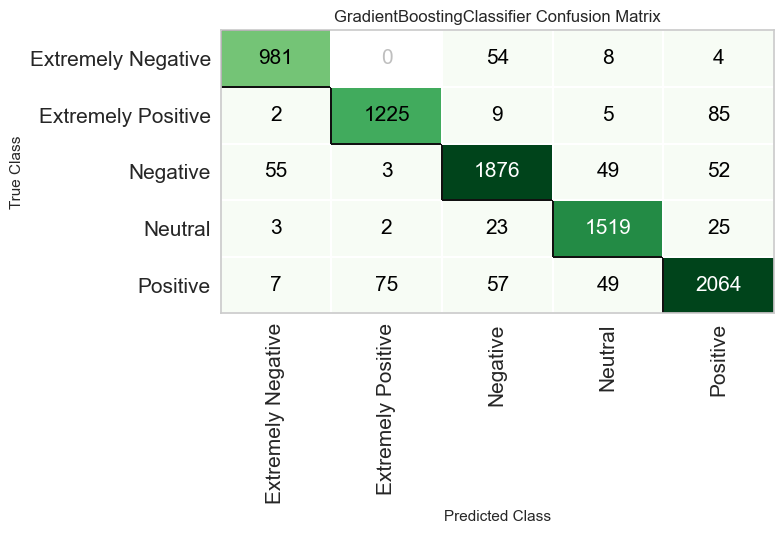

In [14]:
plot_model(gbc, plot = 'confusion_matrix')

In [15]:
pred_unseen = predict_model(gbc, data = df_test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.0000,0.9765,0,0,0,0,0


0.89942074776198

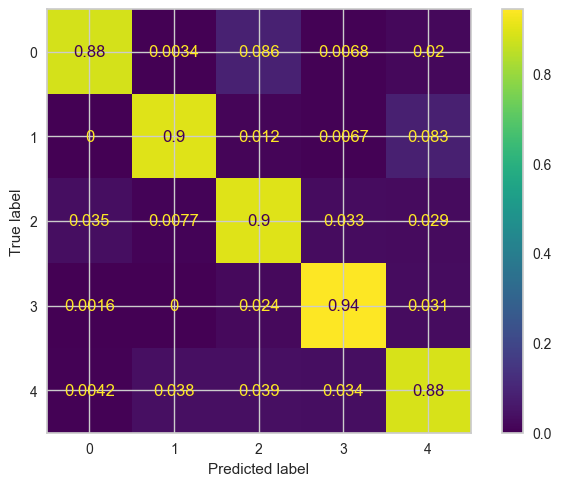

In [18]:
cm = confusion_matrix(pred_unseen["Sentiment"], pred_unseen["Label"], normalize="true")
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
accuracy_score(pred_unseen["Sentiment"], pred_unseen["Label"])